In [1]:
import sys
sys.path.append('../..')
import ugent

In [19]:
from pyslise import PysliseHalf
from math import pi, sin, cos

beta = 15
def V(x):
    return beta**2 * sin(2*x)**2 - 2*beta * cos(2*x)

coffey_evans = PysliseHalf(V, pi/2, tolerance=1e-8)
print(coffey_evans.eigenvaluesByIndex(0, 10, (0,1)))

[(0, -4.846432289843153e-11), (1, 57.88330684867908), (2, 111.20233335159686), (3, 111.22706944215501), (4, 111.25188081868174), (5, 159.18267243286786), (6, 197.3328583629944), (7, 199.8690055338265), (8, 203.22952950201292), (9, 232.3601150080202)]


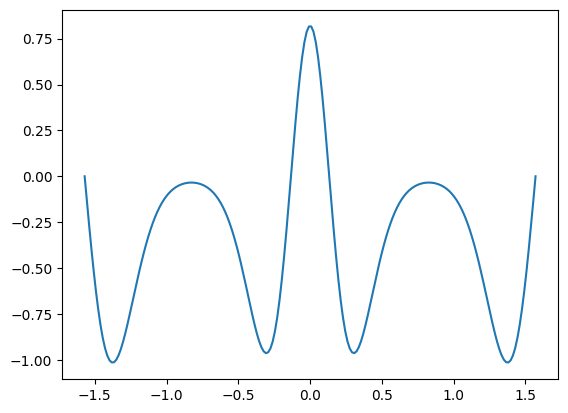

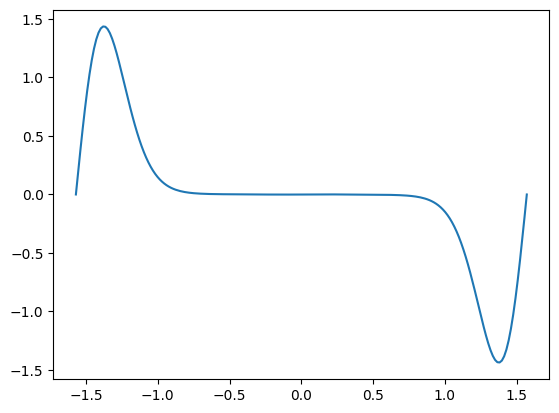

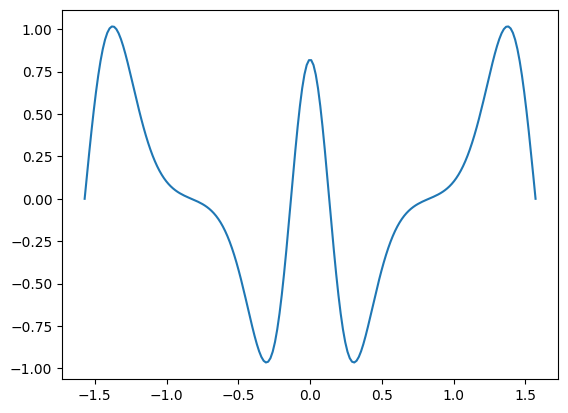

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-pi/2, pi/2, 200)

for i, E, f in coffey_evans.eigenpairsByIndex(2, 5, (0, 1)):
    plt.plot(x, f(x)[0,:])
    plt.show()

In [11]:
import matplotlib.pyplot as plt
import string
import numpy as np
import matplotlib as mpl
from math import pi , cos, sin
from pyslise import PysliseHalf

beta = 25

def V(x):
    return beta**2 * sin(2 * x)**2 - 2 * beta * cos(2 * x)

coffey = PysliseHalf(V, pi/2, tolerance=1e-14)
left = (0, 1)
right = (0, 1)

results = []
for i, E in coffey.eigenvaluesByIndex(0, 10, left, right):
    results.append((i, E, coffey.eigenvalueError(E, left, right, index=i)))
results

[(0, -5.158979791153178e-15, 1.7359924321144706e-13),
 (1, 97.93456168636371, 3.979039320256561e-13),
 (2, 191.5876270396656, 7.389644451905042e-13),
 (3, 191.5876332913995, 6.821210263296962e-13),
 (4, 191.58763954313727, 5.400124791776761e-13),
 (5, 280.6142452706787, 3.979039320256561e-13),
 (6, 364.5514239171785, 6.252776074688882e-13),
 (7, 364.5556442011432, 4.547473508864641e-13),
 (8, 364.5598657470625, 5.684341886080801e-13),
 (9, 442.75654719685264, 2.9558577807620168e-12)]

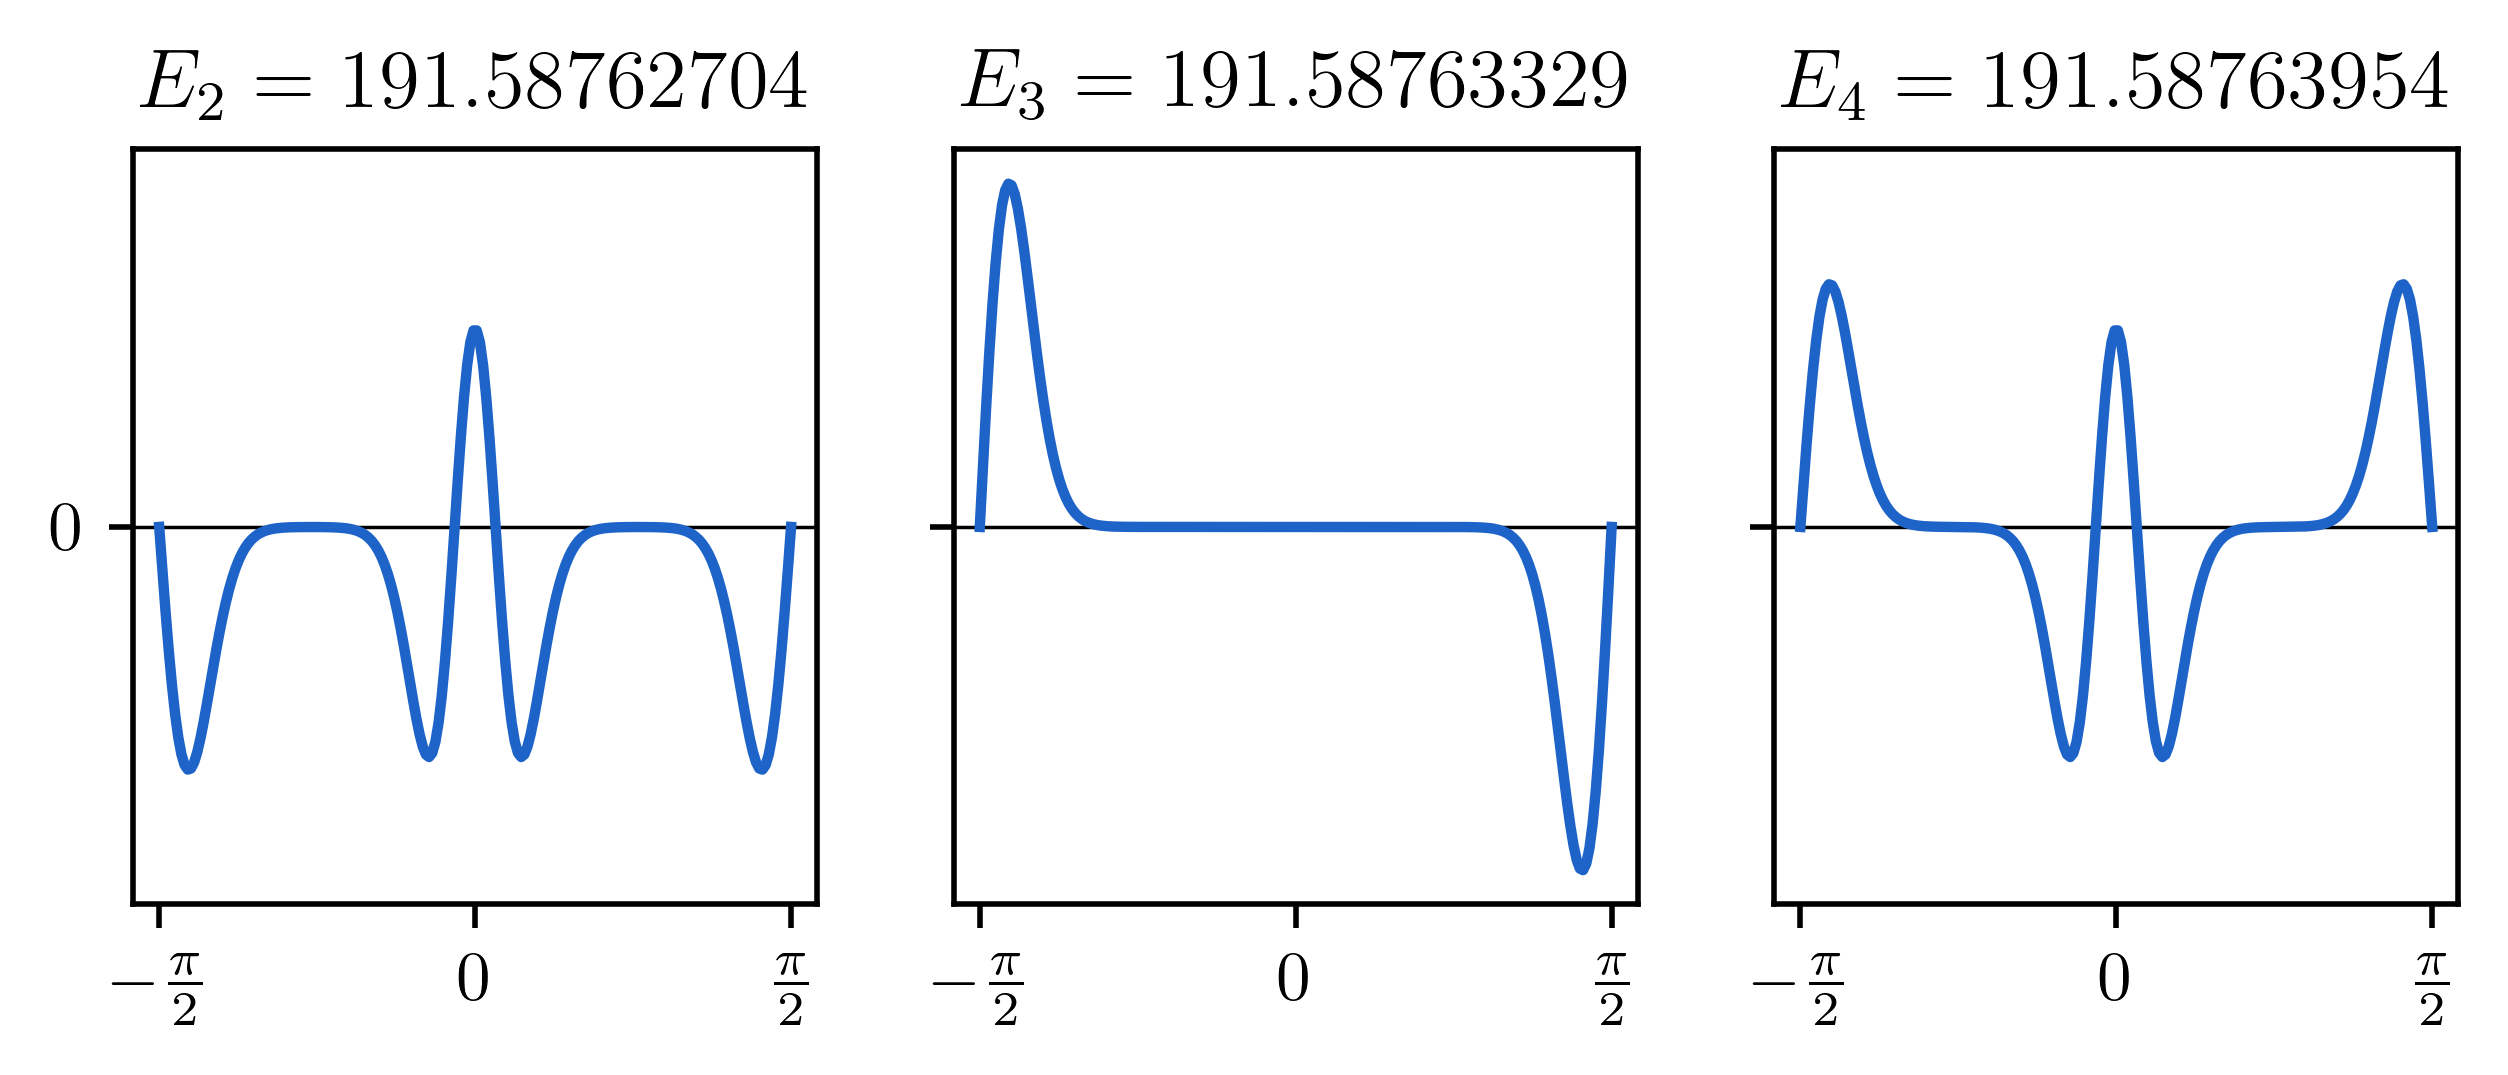

In [50]:
xs = np.linspace(-pi/2, pi/2, 200)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 2), dpi=500)

for ax, (i, E, f) in zip(axes, coffey.eigenpairsByIndex(2, 5, left, right)):
    vals = f(xs)[0, :]
    ax.hlines(0, -2, 2, color=ugent.zwart, lw=0.5, zorder=-1)
    ax.plot(xs, vals, color=ugent.blauw)
    ax.set_title(f"$E_{{{i}}} = {E:.8f}$")
    ax.set_xlim([-1.7,1.7])
    ax.set_yticks([0])
    ax.set_xticks([-pi/2, 0, pi/2])
    ax.set_xticklabels(["$-\\frac{\\pi}{2}$", "$0$", "$\\frac{\\pi}{2}$"])

plt.savefig("coffey_evans_eigenfunctions.pdf", bbox_inches="tight")